some context

In linear regression, the goal is usually to fit a regression line to the data such that the error due to deviation is minimal.

the goal for simple linear regression is to minimize the deviation of the data points from the regression line.

## suport vector

SVR model sets a threshold error allowance ϵ
 around the regression line such that all the data points within ϵ
 are not penalized for their error.

Therefore, the bound is error insensitive and is called ϵ-insensitive tube or simply ϵ-tube.



Data points that fall outside the ϵ
-tube are penalized for their error:

The error associated with the data point above ϵ
* tube is computed as the verticle distance between the datapoint and ϵ
* tube’s margin.
If the data is below the tube, an error is the verticle distance between the ϵ
* tube’s lower bound and the datapoint.

note that the error is taken from the tube’s margin and not the regression line

Whenever a data point is above the tube’s margin, the deviation is denoted as ζ
 and ζ∗
 when it is below. Both the ζ
 and ζ∗
 are called Slack Variables.

 These points are the ones that dictate how the ϵ
-tube is created. They are thus called the Support Vector.

# implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_set = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
data_set.columns

Index(['YearsExperience', 'Salary'], dtype='object')

separate into features and study variables

In [ ]:
X_l = data_set.iloc[:, :1].values

In [ ]:
X_l

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y_p = data_set.iloc[:, 1].values

In [ ]:
X_l

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y_p = y_p.reshape(-1,1)


In [ ]:
y_p

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

import the scalar we want and scale labels and features

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p)

In [ ]:
X_l # this is the scaled

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [ ]:
y_p # this is the scaled

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

we can see both variables were scaled within the range -3 and +3.

visualizatin the data to know what SVR model suits better

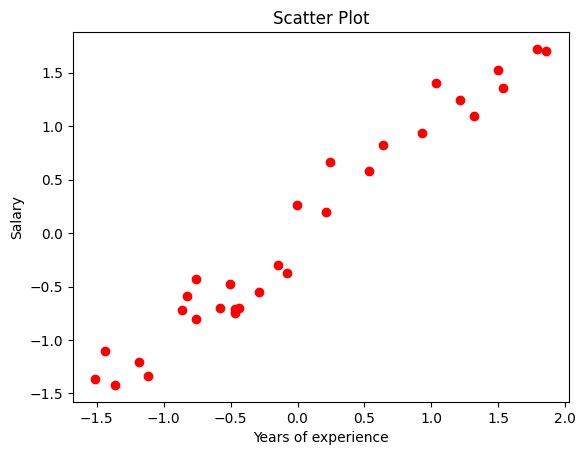

In [ ]:
plt.scatter(X_l, y_p, color = 'red')
plt.title('Scatter Plot')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

the data is non linear, we can use RFB kernel. Radial Basis Function

In [ ]:
from sklearn.svm import SVR

In [ ]:
# from sklearn.svm import SVR??
#here you can see more information

In [ ]:
regressor = SVR(kernel = 'rbf') # creation of the model


In [ ]:
regressor.fit(X_l, y_p.flatten()) #
 # moving the data to fit the model

SVR()

In [ ]:
A=regressor.predict(StdS_X.transform([[4.5]]))


In [ ]:
A

array([-0.44058596])

There is a problem. Model predict values are for the scaled study variable. But, the required value for the business is the output of the unscaled data.

then we must go back to the real study variable, we will write a program whose objective is to take the predicted values on the scaled range and transform them to the actual scale.

## take an inverse of the transformation on the study variable.

In [ ]:
# Convert A to 2D
A = A.reshape(-1,1)
A

array([[-0.44058596]])

We now have to use the inverse transformation to convert it to an unscaled value in the original dataset as shown:


In [ ]:
A_pred = StdS_y.inverse_transform(A)
A_pred

array([[64127.60010341]])

Too many steps but we can make it simpler to run with one cell

In [ ]:
B_pred = StdS_y.inverse_transform(regressor.predict(StdS_X.transform([[4.5]])).reshape(-1,1))
B_pred # you will see that are the same values

array([[64127.60010341]])

Now lets visualize the model

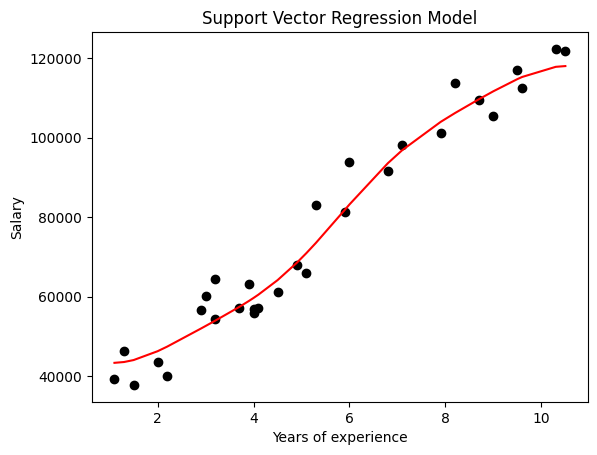

In [ ]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(y_p), color = 'black')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor.predict(X_l).reshape(-1,1)), color = 'red')
plt.title('Support Vector Regression Model')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()